<a href="https://colab.research.google.com/gist/yusufgulerr/e377b7020f5678b05a186eb5de7e3e67/untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/







In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.compose import ColumnTransformer

X, y = load_iris(as_frame=True, return_X_y=True)
sepal_cols = ["sepal length (cm)", "sepal width (cm)"]
petal_cols = ["petal length (cm)", "petal width (cm)"]

preprocessor = ColumnTransformer(
    [
        ("scaler", StandardScaler(), sepal_cols),
        ("kbin", KBinsDiscretizer(encode="ordinal"), petal_cols),
    ],
    verbose_feature_names_out=False,
).set_output(transform="pandas")

X_out = preprocessor.fit_transform(X)
X_out.sample(n=5, random_state=0)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
114,-0.052506,-0.592373,3.0,4.0
62,0.189830,-1.973554,2.0,1.0
33,-0.416010,2.630382,0.0,1.0
107,1.765012,-0.362176,4.0,3.0
7,-1.021849,0.788808,1.0,1.0


In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.ensemble import HistGradientBoostingRegressor

X, y = load_diabetes(return_X_y=True, as_frame=True)

hist_no_interact = HistGradientBoostingRegressor(
    interaction_cst=[[i] for i in range(X.shape[1])], random_state=0
)
hist_no_interact.fit(X, y)

HistGradientBoostingRegressor(interaction_cst=[[0], [1], [2], [3], [4], [5],
                                               [6], [7], [8], [9]],
                              random_state=0)

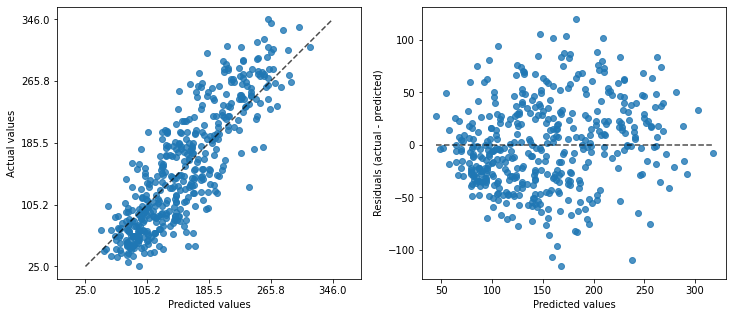

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import PredictionErrorDisplay

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
_ = PredictionErrorDisplay.from_estimator(
    hist_no_interact, X, y, kind="actual_vs_predicted", ax=axs[0]
)
_ = PredictionErrorDisplay.from_estimator(
    hist_no_interact, X, y, kind="residual_vs_predicted", ax=axs[1]
)

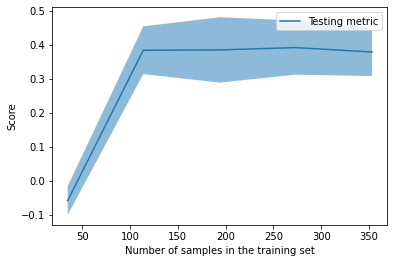

In [ ]:
from sklearn.model_selection import LearningCurveDisplay

_ = LearningCurveDisplay.from_estimator(
    hist_no_interact, X, y, cv=5, n_jobs=2, train_sizes=np.linspace(0.1, 1, 5)
)

In [ ]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml(
    "titanic", version=1, as_frame=True, return_X_y=True, parser="pandas"
)
X = X.select_dtypes(["number", "category"]).drop(columns=["body"])
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import make_pipeline

categorical_features = ["pclass", "sex", "embarked"]
model = make_pipeline(
    ColumnTransformer(
        transformers=[("cat", OrdinalEncoder(), categorical_features)],
        remainder="passthrough",
    ),
    HistGradientBoostingRegressor(random_state=0),
).fit(X, y)

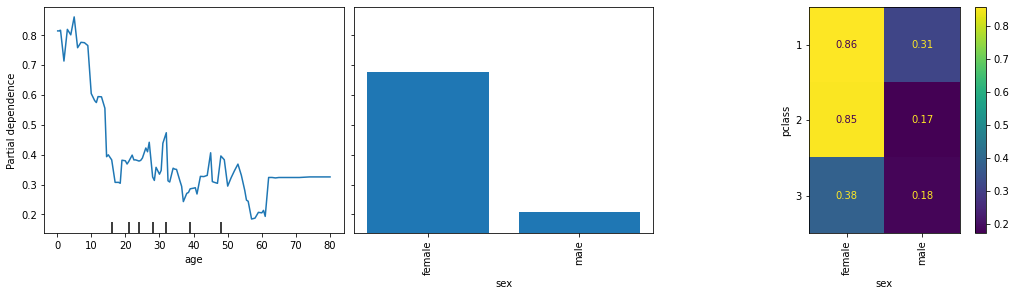

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

fig, ax = plt.subplots(figsize=(14, 4), constrained_layout=True)
_ = PartialDependenceDisplay.from_estimator(
    model,
    X,
    features=["age", "sex", ("pclass", "sex")],
    categorical_features=categorical_features,
    ax=ax,
)

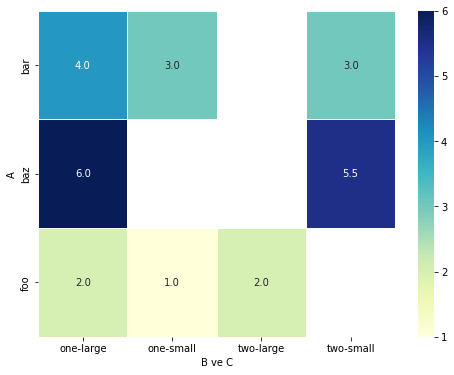

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Veri seti oluşturma
data = pd.DataFrame({
    "A": ["foo", "foo", "foo", "bar", "bar", "bar", "baz", "baz", "baz"],
    "B": ["one", "one", "two", "two", "one", "one", "two", "two", "one"],
    "C": ["small", "large", "large", "small", "small", "large", "small", "small", "large"],
    "D": [1, 2, 2, 3, 3, 4, 5, 6, 6]
})

# Heatmap oluşturma
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(data.pivot_table(index="A", columns=["B", "C"], values="D", aggfunc="mean"), cmap="YlGnBu", annot=True, fmt=".1f", linewidths=.5, ax=ax)
ax.set_xlabel("B ve C")
ax.set_ylabel("A")
plt.show()

# Yeni Bölüm